# Assignment 7

### Step 1

In [ ]:
# reads in shakespeare macbeth play
file = open("Macbeth.txt")
text = file.read()
file.close()

### Step 2

In [17]:
# Tokenize the words, remove stopwords, stem or lemmatize the words, and calculate the word frequencies

# imports
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
#nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
import collections
from collections import Counter

# tokenization
sent = sent_tokenize(text)
words = []
for s in sent:
    for w in word_tokenize(s):
        words.append(w)

# removing stopwords
myStopWords = list(punctuation) + stopwords.words('english') + list(['’', '?', ']', '['])
wordsNoStopComp = [w for w in words if w not in myStopWords]

# lemmatize
macbethstemmed = [WordNetLemmatizer().lemmatize(w) for w in wordsNoStopComp]

# top 50 most frequent words in Macbeth
word_freq = collections.Counter(wordsNoStopComp)
print(word_freq.most_common(50))

[('I', 348), ('MACBETH', 208), ('And', 154), ('The', 147), ('That', 92), ('MACDUFF', 80), ('LADY', 80), ('Macbeth', 79), ('To', 74), ('Enter', 71), ('thou', 66), ('What', 65), ('thee', 60), ('A', 55), ('us', 55), ('But', 53), ('upon', 52), ('WITCH', 51), ('yet', 48), ('shall', 47), ('good', 44), ('time', 44), ('thy', 43), ('th', 43), ('MALCOLM', 41), ('He', 41), ('ROSS', 39), ('hath', 39), ('Banquo', 38), ('FIRST', 38), ('done', 38), ('would', 37), ('As', 35), ('Which', 35), ('say', 35), ('make', 35), ('BANQUO', 34), ('like', 34), ('lord', 34), ('fear', 34), ('come', 33), ('man', 33), ('In', 32), ('know', 32), ('Macduff', 31), ('must', 31), ('We', 31), ('MURDERER', 31), ('My', 30), ('SCENE', 29)]


In [31]:
# imports
import pandas as pd
import numpy as np

In [41]:
# For the word frequencies, calculate the mean, median, mode, and trimmed mean
# For the trimmed mean, you can choose what to trim, but comment on the number used for trimming.
df_word = pd.DataFrame({"Word Freq": word_freq.values()})
print("Mean:", df_word["Word Freq"].mean())
print("\nMedian:", df_word["Word Freq"].median())
print("\nMode:", df_word["Word Freq"].mode())
print("\nTrimmed Mean (Trimmed where count > 1):", df_word[df_word["Word Freq"] > 1].count().mean())

Mean: 3.261554902484638

Median: 1.0

Mode: 0    1
dtype: int64

Trimmed Mean (Trimmed where count > 1): 1421.0


Mean:  3.261554902484638
Median:  1.0
Mode:  0    1
dtype: int64


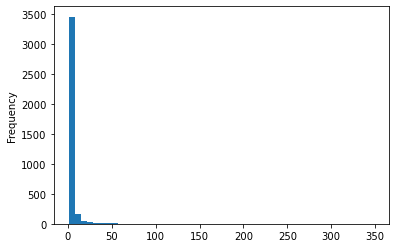

In [46]:
# Plot a histogram of the word frequency data and comment on the relative locations of the mean, median, mode, and trimmed mean
df_word["Word Freq"].plot(kind='hist',bins=50)
print('Mean: ',df_word["Word Freq"].mean())
print('Median: ',df_word["Word Freq"].median())
print('Mode: ',df_word["Word Freq"].mode())

The mean, median, and mode are very close to the left. This suggests that the central tendency of the distribution is uneven. As seen with the histogram, it is right-skewed.

In [69]:
# Calculate the standard deviation and the interquartile range (the difference of the 75% and 25% quantile)
print("Standard deviation:", np.std(df_word["Word Freq"]))
Q1 = df_word["Word Freq"].quantile(0.25)
Q3 = df_word["Word Freq"].quantile(0.75)
print("Interquartile range:", Q3 - Q1)

Standard deviation: 9.660202542288374
Interquartile range: 1.0


Similarily, the Interquartile range (IQR) is very close the left and is very small as well as the standard deviation. Standard deviation is slightly larger than the IQR since some outlier points are very large and the distribution is not focused to heavily on the right.

### Step 3

In [71]:
# Import scikit-learn
from sklearn import datasets
df = datasets.load_diabetes(as_frame=True)
features_df = df.data
target_df = df.target

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

<class 'sklearn.utils.Bunch'>
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.634285e-16  1.308343e-16 -8.045349e-16  1.281655e-16 -8.835316e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670611e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564384e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320442e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   1.327024e-16 -4.574646e-16  3.777301e-16 -3.830854e-16 -3.412882e-16  
std    4.761905e-02  4.7

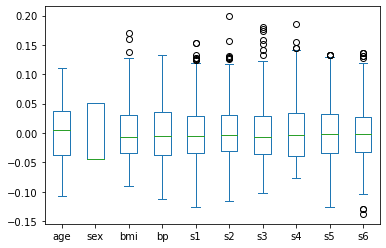

In [78]:
# Do some exploratory data analysis of the features, including getting summary statistical information
print(type(df))
print(features_df.describe())
features_df.plot(kind='box')

In [107]:
# Find the column in features_df that has the highest correlation coefficient with the target values in target_df
ml = features_df.copy()
ml["y"] = target_df
print(ml.corr())
print(ml.corr()["y"])
print("\nBMI body mass index, has the highest correlation coefficient:", 0.586450)

          age       sex       bmi        bp        s1        s2        s3  \
age  1.000000  0.173737  0.185085  0.335427  0.260061  0.219243 -0.075181   
sex  0.173737  1.000000  0.088161  0.241013  0.035277  0.142637 -0.379090   
bmi  0.185085  0.088161  1.000000  0.395415  0.249777  0.261170 -0.366811   
bp   0.335427  0.241013  0.395415  1.000000  0.242470  0.185558 -0.178761   
s1   0.260061  0.035277  0.249777  0.242470  1.000000  0.896663  0.051519   
s2   0.219243  0.142637  0.261170  0.185558  0.896663  1.000000 -0.196455   
s3  -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455  1.000000   
s4   0.203841  0.332115  0.413807  0.257653  0.542207  0.659817 -0.738493   
s5   0.270777  0.149918  0.446159  0.393478  0.515501  0.318353 -0.398577   
s6   0.301731  0.208133  0.388680  0.390429  0.325717  0.290600 -0.273697   
y    0.187889  0.043062  0.586450  0.441484  0.212022  0.174054 -0.394789   

           s4        s5        s6         y  
age  0.203841  0.270777  0.30

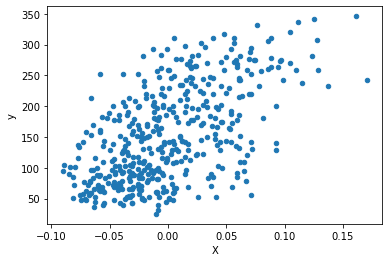

In [109]:
# Make a scatter plot of the target values vs this feature column's values
# comment on how the plotted points match up with the correlation coefficient
X = features_df
y = target_df
model = pd.DataFrame({"X": X["bmi"], "y": y})
model.plot(kind='scatter',
        x= "X",
        y= "y");

The plotted values seem to be positively correlated. Since the strength of the coefficient is positive, it makes sense that the plot looks like it is positively distributed, increasing in y for every increase in x.

Regression Coef: [949.43526038]
Regression intercept: 152.1334841628967
MSE: 3890.4565854612724
r-squared: 0.3439237602253803


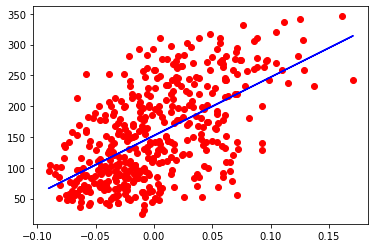

In [137]:
# Using this feature and target, perform linear regression with sklearn's LinearRegression
# Print the coefficients of the model
# Plot the linear fit on top of the scatter plot
# Calculate (or output) the mean squared error and R-squared values for your fit
X = np.array(features_df["bmi"])
reg = LinearRegression().fit(X.reshape(-1,1), y)
print("Regression Coef:", reg.coef_)
print("Regression intercept:", reg.intercept_)
ytrain = reg.intercept_ + reg.coef_ * X
plt.plot(X,y,'ro',X,ytrain,'b-')
print("MSE:", mean_squared_error(y, ytrain))
print("r-squared:", r2_score(y, ytrain))

Regression Coef: [304.18307453]

Regression intercept: 152.13348416289605
MSE: 5720.5470172056475
r-squared: 0.03530218264671636


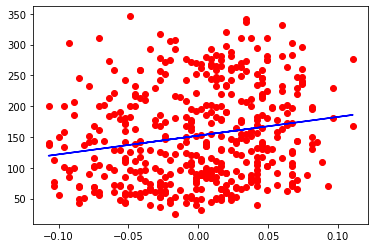

In [136]:
# Try doing linear regression with another variable
# check how the new fit's mean squared error and R-squared values change.
X = np.array(features_df["age"])
reg = LinearRegression().fit(X.reshape(-1,1), y)
print("Regression Coef:", reg.coef_)
print("Regression intercept:", reg.intercept_)
ytrain = reg.intercept_ + reg.coef_ * X
plt.plot(X,y,'ro',X,ytrain,'b-')
print("MSE:", mean_squared_error(y, ytrain))
print("r-squared:", r2_score(y, ytrain))